In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from numpy import random, where
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('SEL.csv',sep=',',low_memory=False)
df = df.iloc[1:]
df.head()

,时间,通道 A,通道 B,通道 D
1,0.00000000,1.61417300,86.61417000,3.38582700
2,0.00000600,1.61417300,86.61417000,3.38582700
3,0.00001201,1.57480300,90.55118000,3.42519700
4,0.00001801,1.53543300,90.55118000,3.42519700
5,0.00002401,1.61417300,90.55118000,3.38582700


In [6]:
df["通道 B"]=df["通道 B"].astype(float)
df["通道 A"]=df["通道 A"].astype(float)
df["通道 D"]=df["通道 D"].astype(float)
df=df[1:7000]

In [7]:
df.shape

(6998, 4)

In [8]:
# df = pd.read_csv('MRTSMPCSM4400CUSN.csv',sep=',',low_memory=False)
# df['date'] = pd.to_datetime(df['date'])

In [9]:
# epsilon=5
# min_samples=1
# db= DBSCAN(eps=5, min_samples=1).fit(np.array(df['value']).reshape(-1,1))

In [14]:
clustering1 = DBSCAN(eps=0.1, min_samples=10).fit(np.array(df['通道 B']).reshape(-1,1))

In [15]:
labels = clustering1.labels_

In [16]:
outlier_pos = np.where(labels == -1)[0]

In [17]:
outlier_pos

array([ 135, 1100, 1552, 1583, 1727, 2930, 3248, 3450, 3891, 4345, 4499,
       4806, 5373, 5406, 6476, 6554, 6853])

In [26]:
x = []; 
y = [];
for pos in outlier_pos:
    
    x.append(np.array(df['时间'])[pos])
    y.append(np.array(df['通道 B'])[pos])

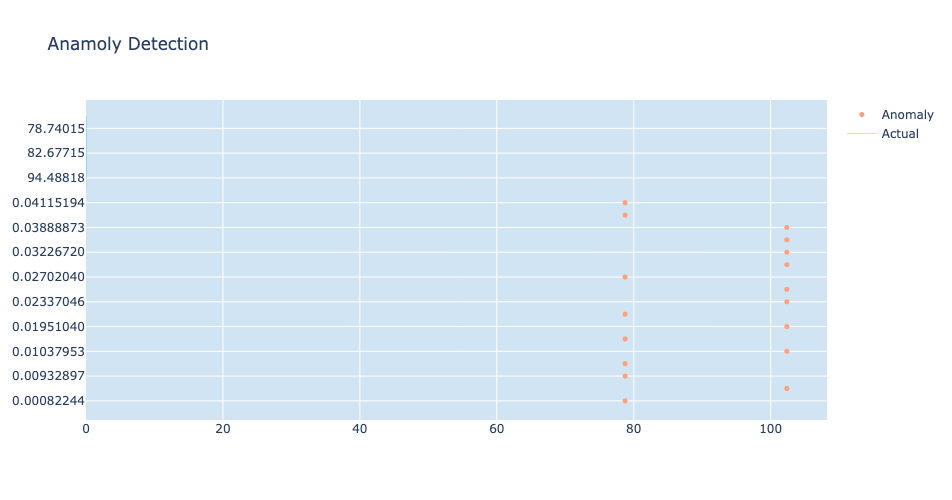

In [35]:
fig1 = go.Figure()

fig1.add_trace(go.Scatter(x=y,
                               y=x,
                               mode='markers',
                               name="Anomaly",
                               marker=dict(color="#FFA07A",
                                    size=5)))
    
fig1.add_trace(go.Scatter(x=df['时间'],
                           y=df['通道 B'],
                           mode='lines',line=dict(color="#00BFFF", width=0.3),
                           name="Actual"))
fig1.update_layout(
                height=500,
                width=900,
                plot_bgcolor="#d0e4f4",title='Anamoly Detection',
                legend_font_size=12)
fig1.show()
                           

Text(0, 0.5, 'value')

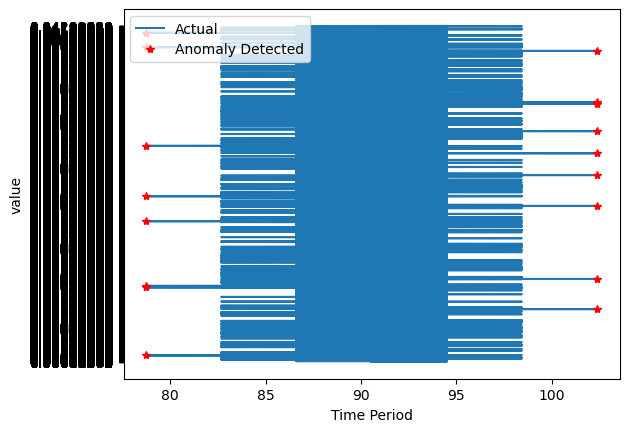

In [37]:
plt.plot(df['通道 B'],df['时间'])
plt.plot(y,x,'r*', markersize=6) 
plt.legend(['Actual', 'Anomaly Detected'])
plt.xlabel('Time Period')
#plt.xticks([0, 20, 40, 60, 80, 99],[df.index[0],df.index[20], df.index[40], df.index[60], df.index[80], df.index[99]] ,rotation=45)
plt.ylabel('value')